0    dava delil Değer kural uygulamak hata yapmak a...
1    taşınmaz imar durum kamu hizmet âlâ belirlemek...
2    sahte fatura kullanmak gerekçe resen tarh edi ...
3    idarî işlem iptal İstem açı dava hata Değer so...
4    asker hizmet sıra ateş silâh yaralamak sonuç ö...
Name: text, dtype: object
Feature Names:
 ['ab' 'abd' 'abdullah' 'abi' 'abla' 'abone' 'abrazyon' 'ac' 'acele' 'acem'
 'acil' 'acı' 'ad' 'ada' 'adalet']
TF-IDF Matrix Sample (First 3 Rows):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_train:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train:
 0    1
1    0
2    0
Name: labels, dtype: int64
X_test:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test:
 0    0
1    0
2    0
Name: labels, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0  

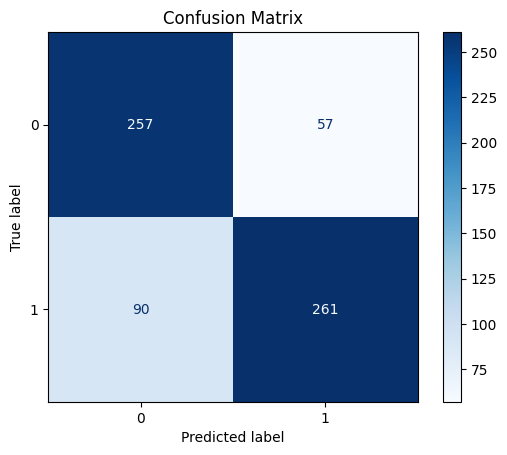

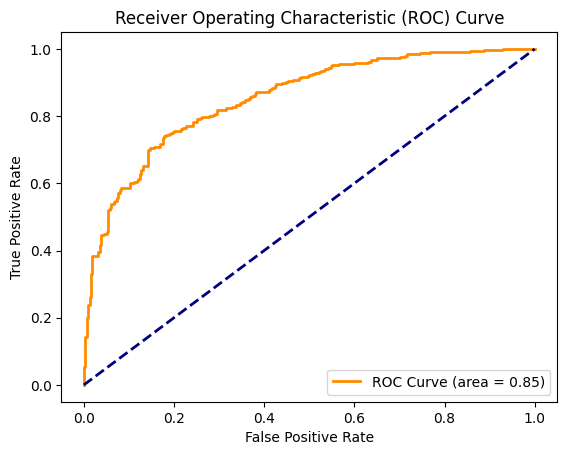

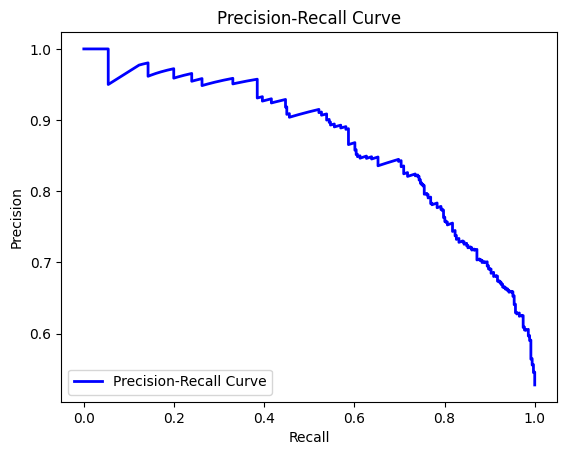

In [2]:
import sys
import io
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import json
import numpy as np

# Set UTF-8 encoding for standard output
# sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return pd.DataFrame(json.load(file))

# Loading preprocessed data with lemmatization applied
train_data = load_data('train_processed.json')
dev_data = load_data('dev_processed.json')
test_data = load_data('test_processed.json')

# Combine train and dev for training
train_dev_data = pd.concat([train_data, dev_data])
print(train_dev_data['text'].head())

# Feature extraction: TF-IDF on 'text' field
vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_dev_data['text']).toarray()
X_test = vectorizer.transform(test_data['text']).toarray()

# Getting outcomes
y_train = train_dev_data['labels']
y_test = test_data['labels']

# Print top 10 X_train and y_train data as well as X_test and y_test data
print("Feature Names:\n", vectorizer.get_feature_names_out()[:15])
print("TF-IDF Matrix Sample (First 3 Rows):\n", X_train[:3])

print("X_train:\n", X_train[:15])
print("y_train:\n", y_train[:3])
print("X_test:\n", X_test[:3])
print("y_test:\n", y_test[:3])

# Train Logistic Regression Classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/PR curves

# Generate and log the classification report
classification_report_text = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_report_text)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the classification report to a file
with open("classification_report.txt", "w", encoding="utf-8") as report_file:
    report_file.write("Classification Report:\n")
    report_file.write(classification_report_text)

print("Classification report saved to 'classification_report.txt'")

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=clf.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=clf.classes_[1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()